In [ ]:
# To test the threshold vs. transport hypothesis

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

HP_Q4 = './Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/HP_Q4.csv'
SO2_Q4 = './Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/SO2_Q4.csv'
SO1_Q4 = './Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/SO1_Q4.csv'
GC_Q4 = './Death_Valley_Surfaces/grain_size_with_channel_geometry_Q4/GC_Q4.csv'

HP_Q4_df = pd.read_csv(HP_Q4).dropna()
SO2_Q4_df = pd.read_csv(SO2_Q4).dropna()
SO1_Q4_df = pd.read_csv(SO1_Q4).dropna()
GC_Q4_df = pd.read_csv(GC_Q4).dropna()

Q4_2016_Fan_Dat = HP_Q4_df.append(GC_Q4_df).append(SO1_Q4_df).append(SO2_Q4_df).reset_index()

In [39]:
Q4_2016_Fan_Dat.head()

index Fan Site   Wbf   Hbf     Slope Surface site_names     latitude  \
0      0  HP  A-1  15.3  1.70  0.094528      Q4     HP-A-1  503554.9974   
1      1  HP  A-1   6.7  0.40  0.096289      Q4     HP-A-1  503554.9974   
2      3  HP  A-2   7.2  0.60  0.091007      Q4     HP-A-2  504274.9701   
3      4  HP  A-7  20.0  0.45  0.073435      Q4     HP-A-7  504967.9199   
4      5  HP  A-7   5.0  0.12  0.073435      Q4     HP-A-7  504967.9199   

     longitude     distance   means     stdevs   D25   D50   D75    D84  \
0  4006986.655  1669.875038  65.640  50.467961  31.0  53.0  84.5  109.5   
1  4006986.655  1669.875038  65.640  50.467961  31.0  53.0  84.5  109.5   
2  4007092.574  2397.119552  65.813  48.064613  37.0  60.0  84.0   96.0   
3  4007266.974  3110.320599  58.392  43.818699  25.0  52.0  79.0   93.0   
4  4007266.974  3110.320599  58.392  43.818699  25.0  52.0  79.0   93.0   

     D90 Unnamed: 6       D50/H  
0  125.5        NaN   31.176471  
1  125.5        NaN  132.500000  
2  126.5        NaN  100.000000  
3  105.0        NaN  115.555556  
4  105.0        NaN  433.333333

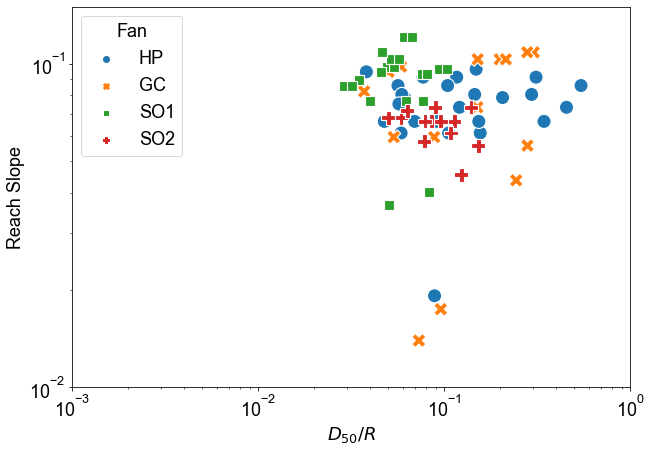

In [54]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'arial',
        'size'   : 18}

mpl.rc('font', **font)



def hydraulic_radius(row):
    area = row['Wbf']*row['Hbf']
    perimeter = row['Wbf']+(row['Hbf']*2)
    return area/perimeter

Q4_2016_Fan_Dat['R'] = Q4_2016_Fan_Dat.apply(hydraulic_radius, axis=1)

Q4_2016_Fan_Dat['D50/R'] = (Q4_2016_Fan_Dat['D50']/1000)/Q4_2016_Fan_Dat['R']


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x="D50/R", y="Slope", hue="Fan", style="Fan", data=Q4_2016_Fan_Dat, ax=ax, s=200);
ax.set_xlabel('$D_{50}/R$')
ax.set_ylabel('Reach Slope')
ax.set_ylim([0.01, 0.15])
ax.set_xlim([0.001, 1])
plt.savefig('figures/Slope vs D5 over R.png')
plt.show()

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
ax.set(xscale="log", yscale="log")
ax.plot([0.1, 10], [0.1, 10], 'k--') # w/d = 1
ax.plot([0.1, 10], [0.1*10, 10*10], 'k--') # w/d = 10
ax.plot([0.1, 10], [0.1*100, 10*100], 'k--') # w/d = 100
ax.plot([0.1, 10], [0.1*1000, 10*1000], 'k--') # w/d = 1000
sns.scatterplot(x="Hbf", y="Wbf", hue="Fan", style="Fan", data=Q4_2016_Fan_Dat, ax=ax, s=200);
ax.set_xlabel('Bankfull Depth $H_{bf}$ [m]')
ax.set_ylabel('Bankfull Width $W_{bf}$ [m]')
ax.set_ylim([0.1, 1000])
ax.set_xlim([0.1, 10])
plt.savefig('figures/WBF vs HBF.png')
plt.show()